In [31]:
import numpy as np
import importlib.util
import matplotlib.pyplot as plt
import seaborn as sns
from repetitive_optimizer import *
from optimized_random_response import *
import pandas as pd
from dataset_handler import *
import seaborn as sns

import warnings

warnings.filterwarnings("ignore")

In [32]:
MI_THRESHOLD = 0.1

LABEL_ENCODED_ATTRIBUTES = ["workclass", "marital-status", "occupation", "relationship", "race", "gender", "native-country", "income", "age_group"]
SKIP_ATTRIBUTES = ["fnlwgt", "capital-gain", "capital-loss"]
file_path = "/Users/sandarujayawardana/Documents/Python_code/adult/adult.csv"

# Read the CSV file
adult_data = pd.read_csv(file_path)

print(adult_data.head())


   age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-week native-country incom

In [33]:


# Remove rows with NaN values
adult_data.dropna(inplace=True)

# Remove rows with '?' entries (assuming '?' is a string)
adult_data = adult_data.replace('?', pd.NA).dropna()

# Remove the "fnlwgt", "capital-gain", "capital-loss" columns


# Define a function to categorize age into 10 year groups
def categorize_age(age):
    return f"{(age // 10) * 10}-{(age // 10) * 10 + 9}"

# Apply the function to create a new column for age group
adult_data['age_group'] = adult_data['age'].apply(categorize_age)

adult_data.drop(['fnlwgt', 'capital-gain', 'capital-loss', 'education', 'age'], axis=1, inplace=True)

# Display the first few rows of the modified DataFrame
adult_data.head()


,workclass,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income,age_group
0,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K,20-29
1,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K,30-39
2,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K,20-29
3,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K,40-49
5,Private,6,Never-married,Other-service,Not-in-family,White,Male,30,United-States,<=50K,30-39


In [34]:
# Create dataset dictionary

data_dict = {}

for attr in adult_data.columns.tolist():
    
    data_dict[attr] = adult_data[attr].to_numpy()

In [35]:
data_dict

{'workclass': array(['Private', 'Private', 'Local-gov', ..., 'Private', 'Private',
        'Self-emp-inc'], dtype=object),
 'educational-num': array([ 7,  9, 12, ...,  9,  9,  9]),
 'marital-status': array(['Never-married', 'Married-civ-spouse', 'Married-civ-spouse', ...,
        'Widowed', 'Never-married', 'Married-civ-spouse'], dtype=object),
 'occupation': array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', ...,
        'Adm-clerical', 'Adm-clerical', 'Exec-managerial'], dtype=object),
 'relationship': array(['Own-child', 'Husband', 'Husband', ..., 'Unmarried', 'Own-child',
        'Wife'], dtype=object),
 'race': array(['Black', 'White', 'White', ..., 'White', 'White', 'White'],
       dtype=object),
 'gender': array(['Male', 'Male', 'Male', ..., 'Female', 'Male', 'Female'],
       dtype=object),
 'hours-per-week': array([40, 50, 40, ..., 40, 20, 40]),
 'native-country': array(['United-States', 'United-States', 'United-States', ...,
        'United-States', 'United-St

In [36]:
dataset_handler = Dataset_handler(data_dict=data_dict, encodable_attributes = LABEL_ENCODED_ATTRIBUTES)
len(dataset_handler.get_encoded_orignal_dataset()["native-country"])

new_attributes ['workclass', 'educational-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'hours-per-week', 'native-country', 'income', 'age_group']


45222

## Group correlated attributes

In [37]:
dataset_handler.get_attribute_list()[10]

'age_group'

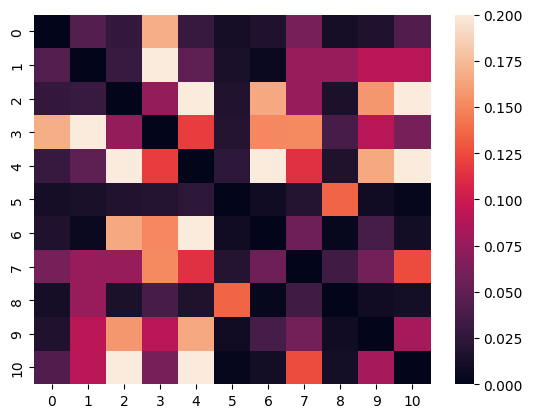

In [39]:
from simpleinfotheory import mutualinformationempirical

num_attributes = len(dataset_handler.get_attribute_list())
mi_pair_wise = np.zeros((num_attributes, num_attributes))

for index_i, i in enumerate(dataset_handler.get_attribute_list()[:]):
    for index_j, j in enumerate(dataset_handler.get_attribute_list()[:]):
        if i == j:
            continue
        # print(index_i, index_j)
        # print(np.shape(dataset_handler.get_encoded_orignal_dataset()[i]))
        # print(dataset_handler.get_encoded_orignal_dataset()[i])
        mi_pair_wise[index_i][index_j] = mutualinformationempirical(dataset_handler.get_encoded_orignal_dataset()[i], dataset_handler.get_encoded_orignal_dataset()[j])[0]
sns.heatmap(mi_pair_wise, vmax=0.5, vmin=0)
plt.show()

In [41]:
for i, value in enumerate(dataset_handler.get_attribute_list()):
    print(i, value) 

0 workclass
1 educational-num
2 marital-status
3 occupation
4 relationship
5 race
6 gender
7 hours-per-week
8 native-country
9 income
10 age_group


selected_values [] remaining_alphabet [[1, 2, 3], [4, 5], [5, 6, 7, 8, 9]]
selected_values [1] remaining_alphabet [[4, 5], [5, 6, 7, 8, 9]]
selected_values [1, 4] remaining_alphabet [[5, 6, 7, 8, 9]]
Leaf [[5, 6, 7, 8, 9]]
created_values  [[1, 4, 5], [1, 4, 6], [1, 4, 7], [1, 4, 8], [1, 4, 9]]
selected_values [1, 5] remaining_alphabet [[5, 6, 7, 8, 9]]
Leaf [[5, 6, 7, 8, 9]]
created_values  [[1, 5, 5], [1, 5, 6], [1, 5, 7], [1, 5, 8], [1, 5, 9]]
selected_values [2] remaining_alphabet [[4, 5], [5, 6, 7, 8, 9]]
selected_values [2, 4] remaining_alphabet [[5, 6, 7, 8, 9]]
Leaf [[5, 6, 7, 8, 9]]
created_values  [[2, 4, 5], [2, 4, 6], [2, 4, 7], [2, 4, 8], [2, 4, 9]]
selected_values [2, 5] remaining_alphabet [[5, 6, 7, 8, 9]]
Leaf [[5, 6, 7, 8, 9]]
created_values  [[2, 5, 5], [2, 5, 6], [2, 5, 7], [2, 5, 8], [2, 5, 9]]
selected_values [3] remaining_alphabet [[4, 5], [5, 6, 7, 8, 9]]
selected_values [3, 4] remaining_alphabet [[5, 6, 7, 8, 9]]
Leaf [[5, 6, 7, 8, 9]]
created_values  [[3, 4, 5],